In [1]:
#import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# imort the dataset of Home Buyers prices
flatdata = pd.read_csv('HomeBuyer.csv')
flatdata.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = flatdata.iloc[:,[0,1]].values
y = flatdata.iloc[:,2].values
print(flatdata)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
5     27            58000          0
6     27            84000          0
7     32           150000          1
8     25            33000          0
9     35            65000          0
10    26            80000          0
11    26            52000          0
12    20            86000          0
13    32            18000          0
14    18            82000          0
15    29            80000          0
16    47            25000          1
17    45            26000          1
18    46            28000          1
19    48            29000          1
20    45            22000          1
21    47            49000          1
22    48            41000          1
23    45            22000          1
24    46            23000          1
25    47            20000          1
2

In [7]:
flatdata.shape

(400, 3)

In [8]:
# split the dataset into training and test set. We will use 75/25 approach
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train) #fit and transform
X_test = independent_scaler.transform(X_test) # only transform

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
#Fit the KNN to the train data
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p = 2)
KNNClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
#predict the values
prediction = KNNClassifier.predict(X_test)
print("")
print("test data :-")
print(X_test)
print("predicted output :-")
print(prediction)
print("")


test data :-
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014 

In [15]:
#Create confusion matrix to evalute performance of data
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, prediction)
print(confusionMatrix)

[[64  4]
 [ 3 29]]


In [16]:
# let is visualize it

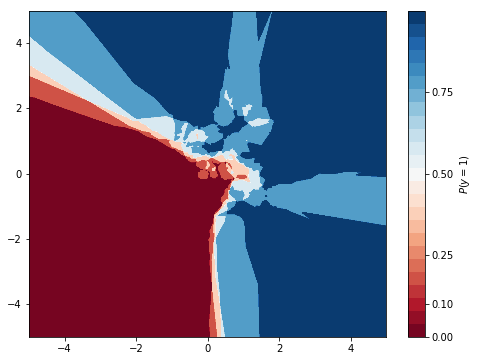

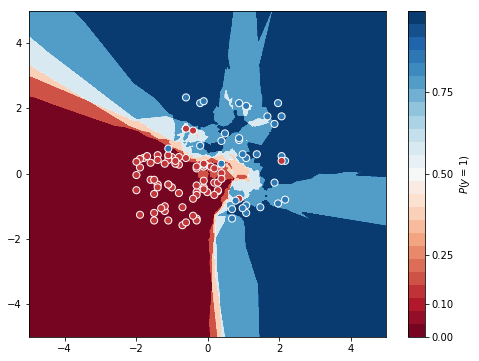

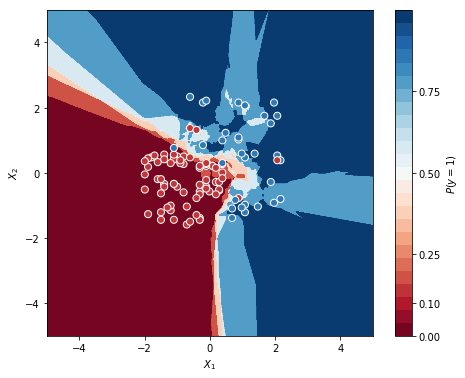

In [19]:
xx, yy =np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = KNNClassifier.predict_proba(grid)[:,1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8,6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin = 0, vmax = 1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75,.1])

ax.scatter(X_test[:,0], X_test[:, 1], c = (y_test == 1), s = 50, cmap = "RdBu",
          vmin =-.2, vmax = 1.2, edgecolor = "white", linewidth=1)

ax.set(aspect="equal", xlim=(-5,5), ylim=(-5,5), xlabel="$X_1$", ylabel="$X_2$")

plt.show()